import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read the file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#you can drop id column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#there are 201 null values in bmi

In [ ]:
df.duplicated().sum()

0

In [ ]:
#no duplicate value

In [ ]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(include=['int','float']).columns

In [ ]:
for i in cat:
  print("feature name :"+i)                  #columns name
  print(df[i].unique())   #input values in each categories columns
  print(df[i].nunique())  #number of different values in each categorical columns

feature name :gender
['Male' 'Female' 'Other']
3
feature name :ever_married
['Yes' 'No']
2
feature name :work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
5
feature name :Residence_type
['Urban' 'Rural']
2
feature name :smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
4


In [ ]:
stroked=df[df['stroke']==df['stroke'].max()]
for i in stroked:
  print("feature name :"+i)
  print(df[i].value_counts()) # number of times it was entered

feature name :id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
feature name :gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
feature name :age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
feature name :hypertension
0    4612
1     498
Name: hypertension, dtype: int64
feature name :heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
feature name :ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
feature name :work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
feature name :Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
feature name :avg_glucose_level


In [ ]:
#there is unknown in smoking_status
#there is other in gender

In [ ]:
print("age mean= "+str(stroked['age'].mean()))
print('avg_glucose_level= '+str(stroked['avg_glucose_level'].mean()))
print('bmi avg= '+str(stroked['bmi'].mean()))

age mean= 67.72819277108434
avg_glucose_level= 132.54473895582328
bmi avg= 30.471291866028707


In [ ]:
# stroked
#58.6% females and 41.4% males
#avg age=43
#if hypertension not a reasson to stroke
# heart disease Positive relationship with stroke
#65% stroked were married and 35% not
#private work increase your chance to stroke
#Residence don't effect
#if glucose level more than 106 increases the probability of injury
#if bmi more than 29 increases the probability of injury

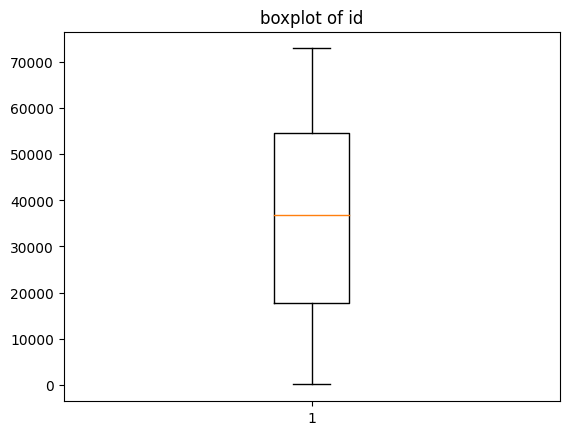

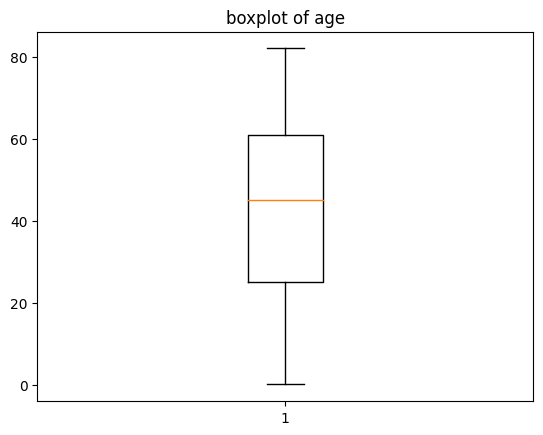

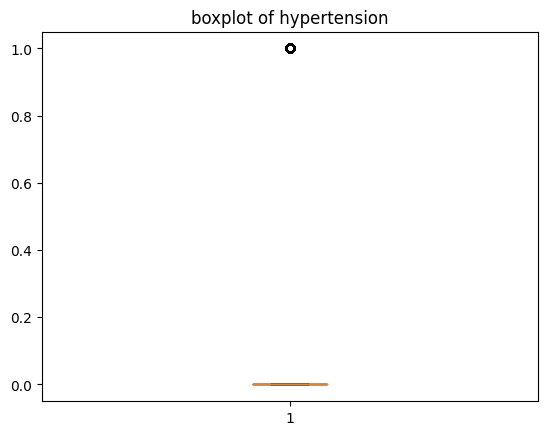

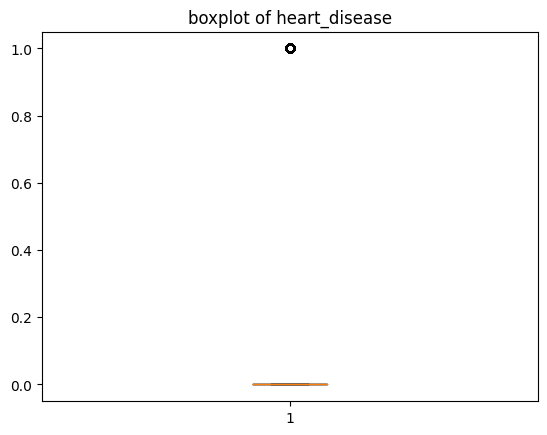

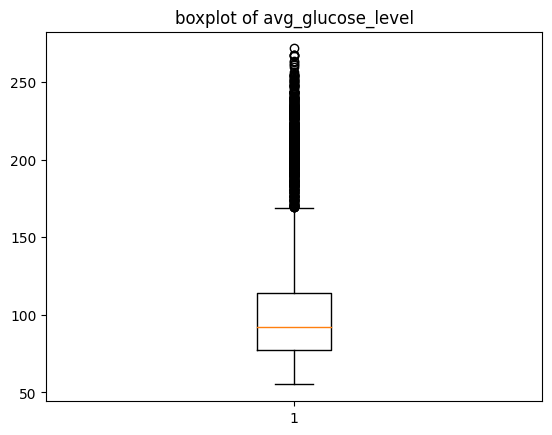

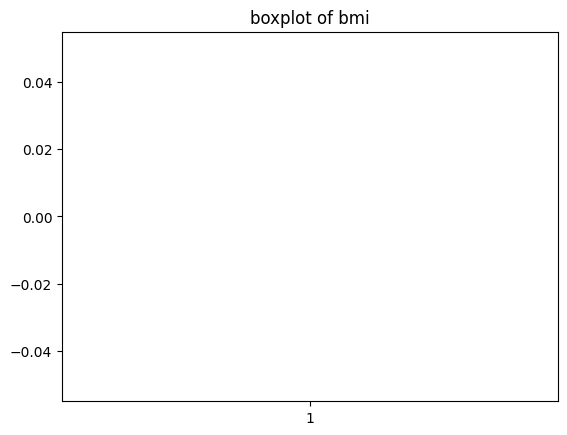

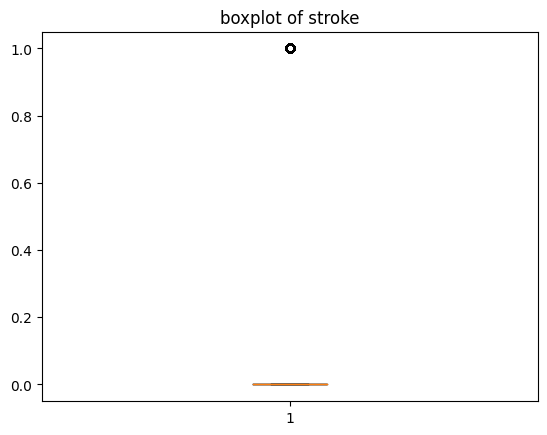

In [ ]:
for i in num :
  plt.boxplot(df[i])
  plt.title(f'boxplot of {i}')
  plt.show()

In [ ]:
#there are outliers on avg_glucose_level

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


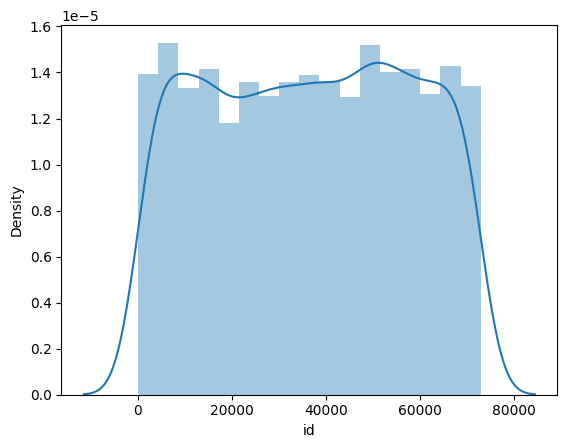

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


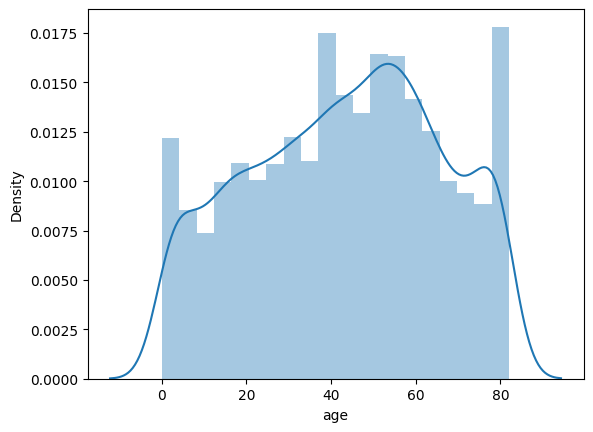

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


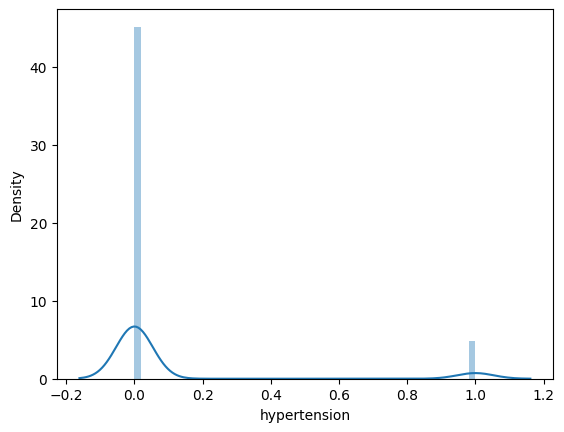

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


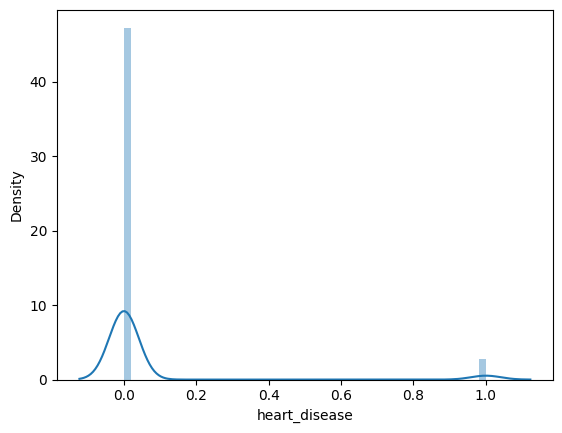

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


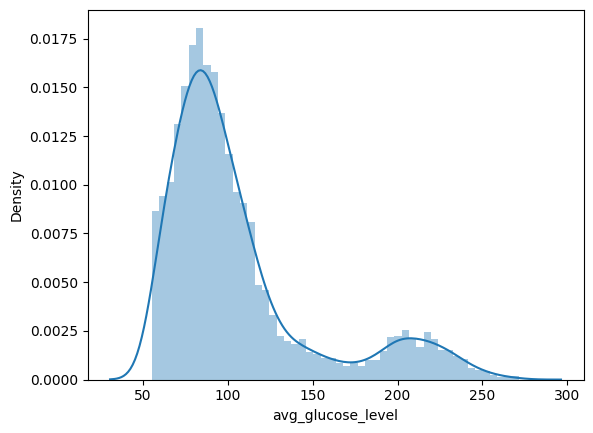

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


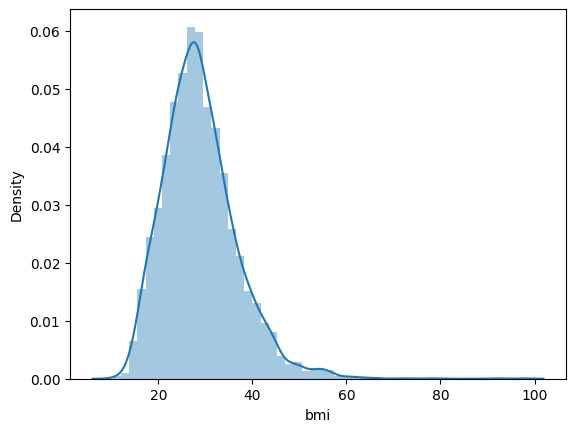

<ipython-input-86-dcd6cd8c08cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


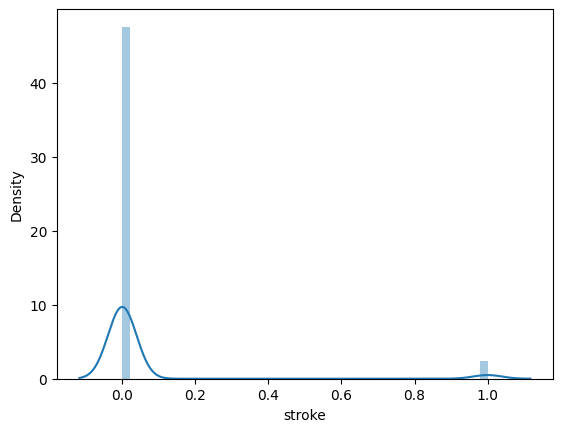

In [ ]:
for i in num:
  sns.distplot(df[i])
  plt.show()

In [ ]:
#skewd to right -> avg_glucose_level,bmi

<ipython-input-88-2b4390b546cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


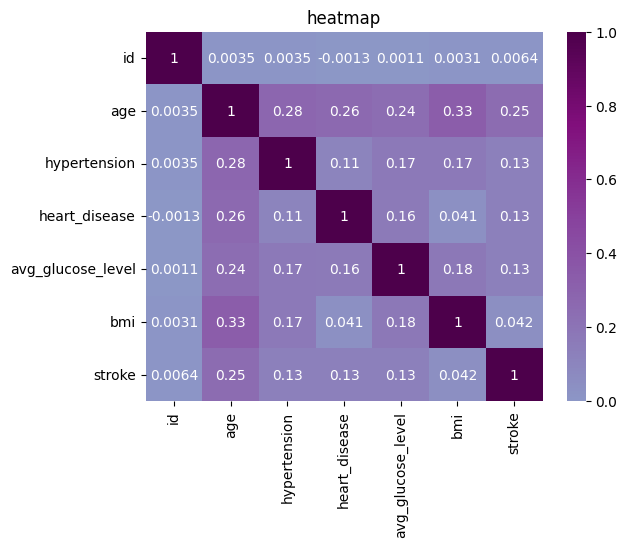

In [ ]:
  corr=df.corr()
  sns.heatmap(corr,annot=True,cmap="BuPu",center=0)
  plt.title("heatmap")
  plt.show()

In [ ]:
# weak correlation with target

In [ ]:
#drop id column
df.drop('id',axis=1,inplace=True)

In [ ]:
#there is unknown in smoking_status
df = df[df['gender'] != 'Other']


In [ ]:
#there is other in gender
#smoking is too dangerous so i will make unknown -> smokes
df['smoking_status'] = df['smoking_status'].replace('unknown', 'smokes')

<ipython-input-92-970da7d7d966>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].replace('unknown', 'smokes')


In [ ]:
print(df['smoking_status'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


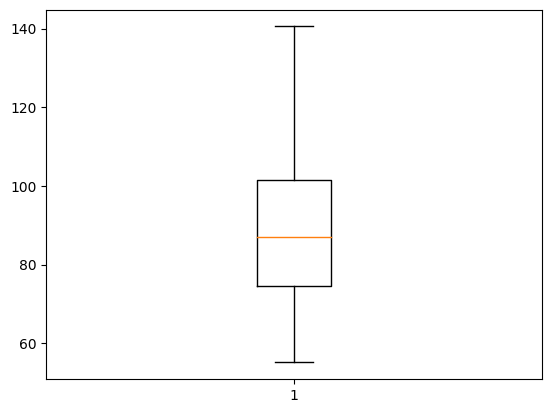

In [ ]:
#deal with outliers
outlier=df['avg_glucose_level'].quantile(0.99)
df=df[df['avg_glucose_level']<outlier]
plt.boxplot(df['avg_glucose_level'])
plt.show()


In [ ]:
#split the data
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df,test_size=0.2,random_state=1)

#fill null values
train_df['bmi'].fillna(train_df['bmi'].mean(),inplace=True)
test_df['bmi'].fillna(test_df['bmi'].mean(),inplace=True)

In [ ]:
train_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#all caterogical columns-> dummies
dummies=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
train_dummies=pd.get_dummies(train_df,columns=dummies)

dummies=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
test_dummies=pd.get_dummies(test_df,columns=dummies)
test_dummies

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1674,65.0,0,0,82.26,19.8,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4841,4.0,0,0,81.87,18.6,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1027,63.0,0,0,79.26,26.6,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
459,11.0,0,0,87.51,24.4,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2016,48.0,1,0,83.34,49.3,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,78.0,0,0,56.34,27.5,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
441,26.0,0,0,82.59,29.4,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3254,65.0,0,0,82.72,29.8,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4442,51.0,0,0,86.95,25.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
#scale numarical data
#StandarScaler-> age
#min_max -> avg_glucose_level,bmi,stroke

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
normal_column=['age']
scaled_feature=scaler.fit_transform(df[['age']])
df_scaled=pd.DataFrame(scaled_feature,columns=normal_column)
print(df_scaled)

           age
0     1.748909
1     1.480839
2     1.257448
3     0.810664
4     1.659553
...        ...
4337 -1.244539
4338  1.748909
4339  1.793588
4340 -0.261616
4341  0.140489

[4342 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_min = MinMaxScaler()
numerical_features = ['avg_glucose_level','bmi']
scale_features = scaler_min.fit_transform(df[numerical_features])
df_scale = pd.DataFrame(scale_features, columns=numerical_features)
print(df_scale)

      avg_glucose_level       bmi
0              0.563630  0.254296
1              0.166093  0.195876
2              0.435704  0.143184
3              0.233330       NaN
4              0.038278  0.159221
...                 ...       ...
4337           0.532120  0.095074
4338           0.317652       NaN
4339           0.777544  0.340206
4340           0.309220  0.232532
4341           0.334628  0.182131

[4342 rows x 2 columns]


In [ ]:
#split train and test

In [ ]:
x_train=train_dummies.drop('stroke',axis=1)
y_train=train_dummies['stroke']

x_test=test_dummies.drop('stroke',axis=1)
y_test=test_dummies['stroke']

In [ ]:
#build model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [ ]:
logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

In [ ]:
logistic_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
naive_bayes_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [ ]:
y_pred_logistic = logistic_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)
y_pred_decision_tree = decision_tree_model.predict(x_test)
y_pred_knn = knn_model.predict(x_test)
y_pred_naive_bayes = naive_bayes_model.predict(x_test)


In [ ]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)
print("\nConfusion Matrix for Support Vector Classifier:")
print(confusion_matrix_svc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_decision_tree)
print("\nConfusion Matrix for KNN Classifier:")
print(confusion_matrix_knn)
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix_naive_bayes)


Confusion Matrix for Logistic Regression:
[[840   0]
 [ 29   0]]

Confusion Matrix for Support Vector Classifier:
[[840   0]
 [ 29   0]]

Confusion Matrix for Decision Tree Classifier:
[[806  34]
 [ 28   1]]

Confusion Matrix for KNN Classifier:
[[833   7]
 [ 29   0]]

Confusion Matrix for Naive Bayes:
[[423 417]
 [  4  25]]


In [ ]:
#best model logistic regression